In [1]:
import numpy as np
from astropy.io import ascii
from astropy.table import Table
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting

In [2]:
data = ascii.read("linear_data_v1.csv")
print(data)

        x               noisy_y             y_error      
------------------ ------------------ -------------------
               0.0 1.7360509309286671  1.6042382156957993
0.3448275862068966  3.661686702075544  1.9425413624122052
0.6896551724137931   1.18057784261486  1.0617529171843838
1.0344827586206897  2.610231712463395 0.31294443360596336
1.3793103448275863  5.959862116812046  1.5883293503598452
1.7241379310344829 4.1941453450668895   2.177753175667884
2.0689655172413794  5.817846322419468  0.5090621195447468
 2.413793103448276   4.36012846802356  1.1434687271480668
2.7586206896551726  6.614945026338582  0.9203573613801007
3.1034482758620694   8.40938073782375  1.6406399247378505
               ...                ...                 ...
6.8965517241379315 14.144107931240505 0.38787329691405426
 7.241379310344828  14.17439339221375  0.9190733501546212
 7.586206896551724 10.044923709321903   2.611328077974711
 7.931034482758621 17.430864750866952  0.5967989843234848
 8.27586206896

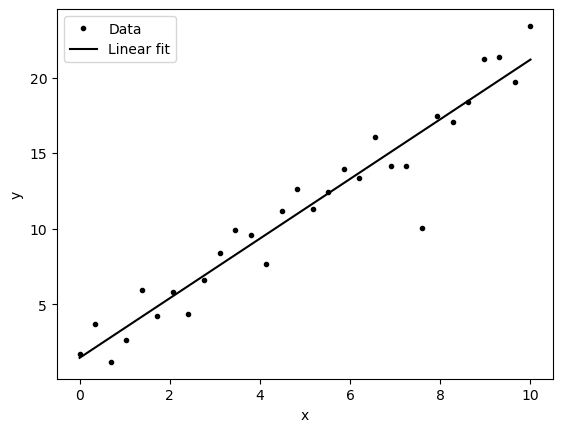

In [27]:
#x = x values, y = noisy_y values. Ignore y_error for now.
x = np.array(data['x'])
y = np.array(data['noisy_y'])
yerror = np.array(data['y_error'])

#fit a line to the (x, y) values
#initialize linear fitter
fitter = fitting.LinearLSQFitter()
#initialize linear model
initline = models.Linear1D()
#fitting a line to the data
linearfit = fitter(initline, x, y)

#plot
fig, linfit = plt.subplots()
linfit.plot(x,y, 'k.', label='Data')
linfit.plot(x,linearfit(x), 'k-', label='Linear fit')
linfit.set(xlabel = 'x', ylabel = 'y')
linfit.legend()

#print fit parameters
